<h1>Preparing the Fire Emblem Dataset</h1>

In [2]:
from PIL import Image as Img
from numpy import asarray, savez_compressed, append, concatenate
from numpy.random import randint
from matplotlib import pyplot as plt
from os import listdir
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
def load_image(path):
    image = Img.open(path)
    image = image.convert("RGB")
    image = image.resize((128,128))
    return asarray(image)

def load_dataset(directory):
    dataset = []
    for image in listdir(directory):
        image = load_image(directory + image)
        dataset.append(image)
        print(f"{len(dataset)} images have been loaded successfuly !", end="\r")
    dataset = asarray(dataset)
    datagenerator = ImageDataGenerator(horizontal_flip=True, zoom_range=[.8,.9], rotation_range=10, height_shift_range=.1, brightness_range=[.85,1.15]) 
    batch = datagenerator.flow(asarray(dataset), batch_size=700)
    for i in range(15):
        newBatch = batch.next()
        dataset = concatenate((dataset, newBatch.astype("uint8")))
    print(dataset.shape)
    return dataset

def show_samples(dataset, n):
    random_indices = randint(0, dataset.shape[0], n*n)
    plt.figure(figsize=(30,30))
    for i in range(n*n):
        plt.subplot(n,n,i+1)
        plt.axis("off")
        plt.imshow(dataset[random_indices[i]]) #randint(0,len(dataset)-1)
    plt.show()

(10016, 128, 128, 3) loaded successfuly !


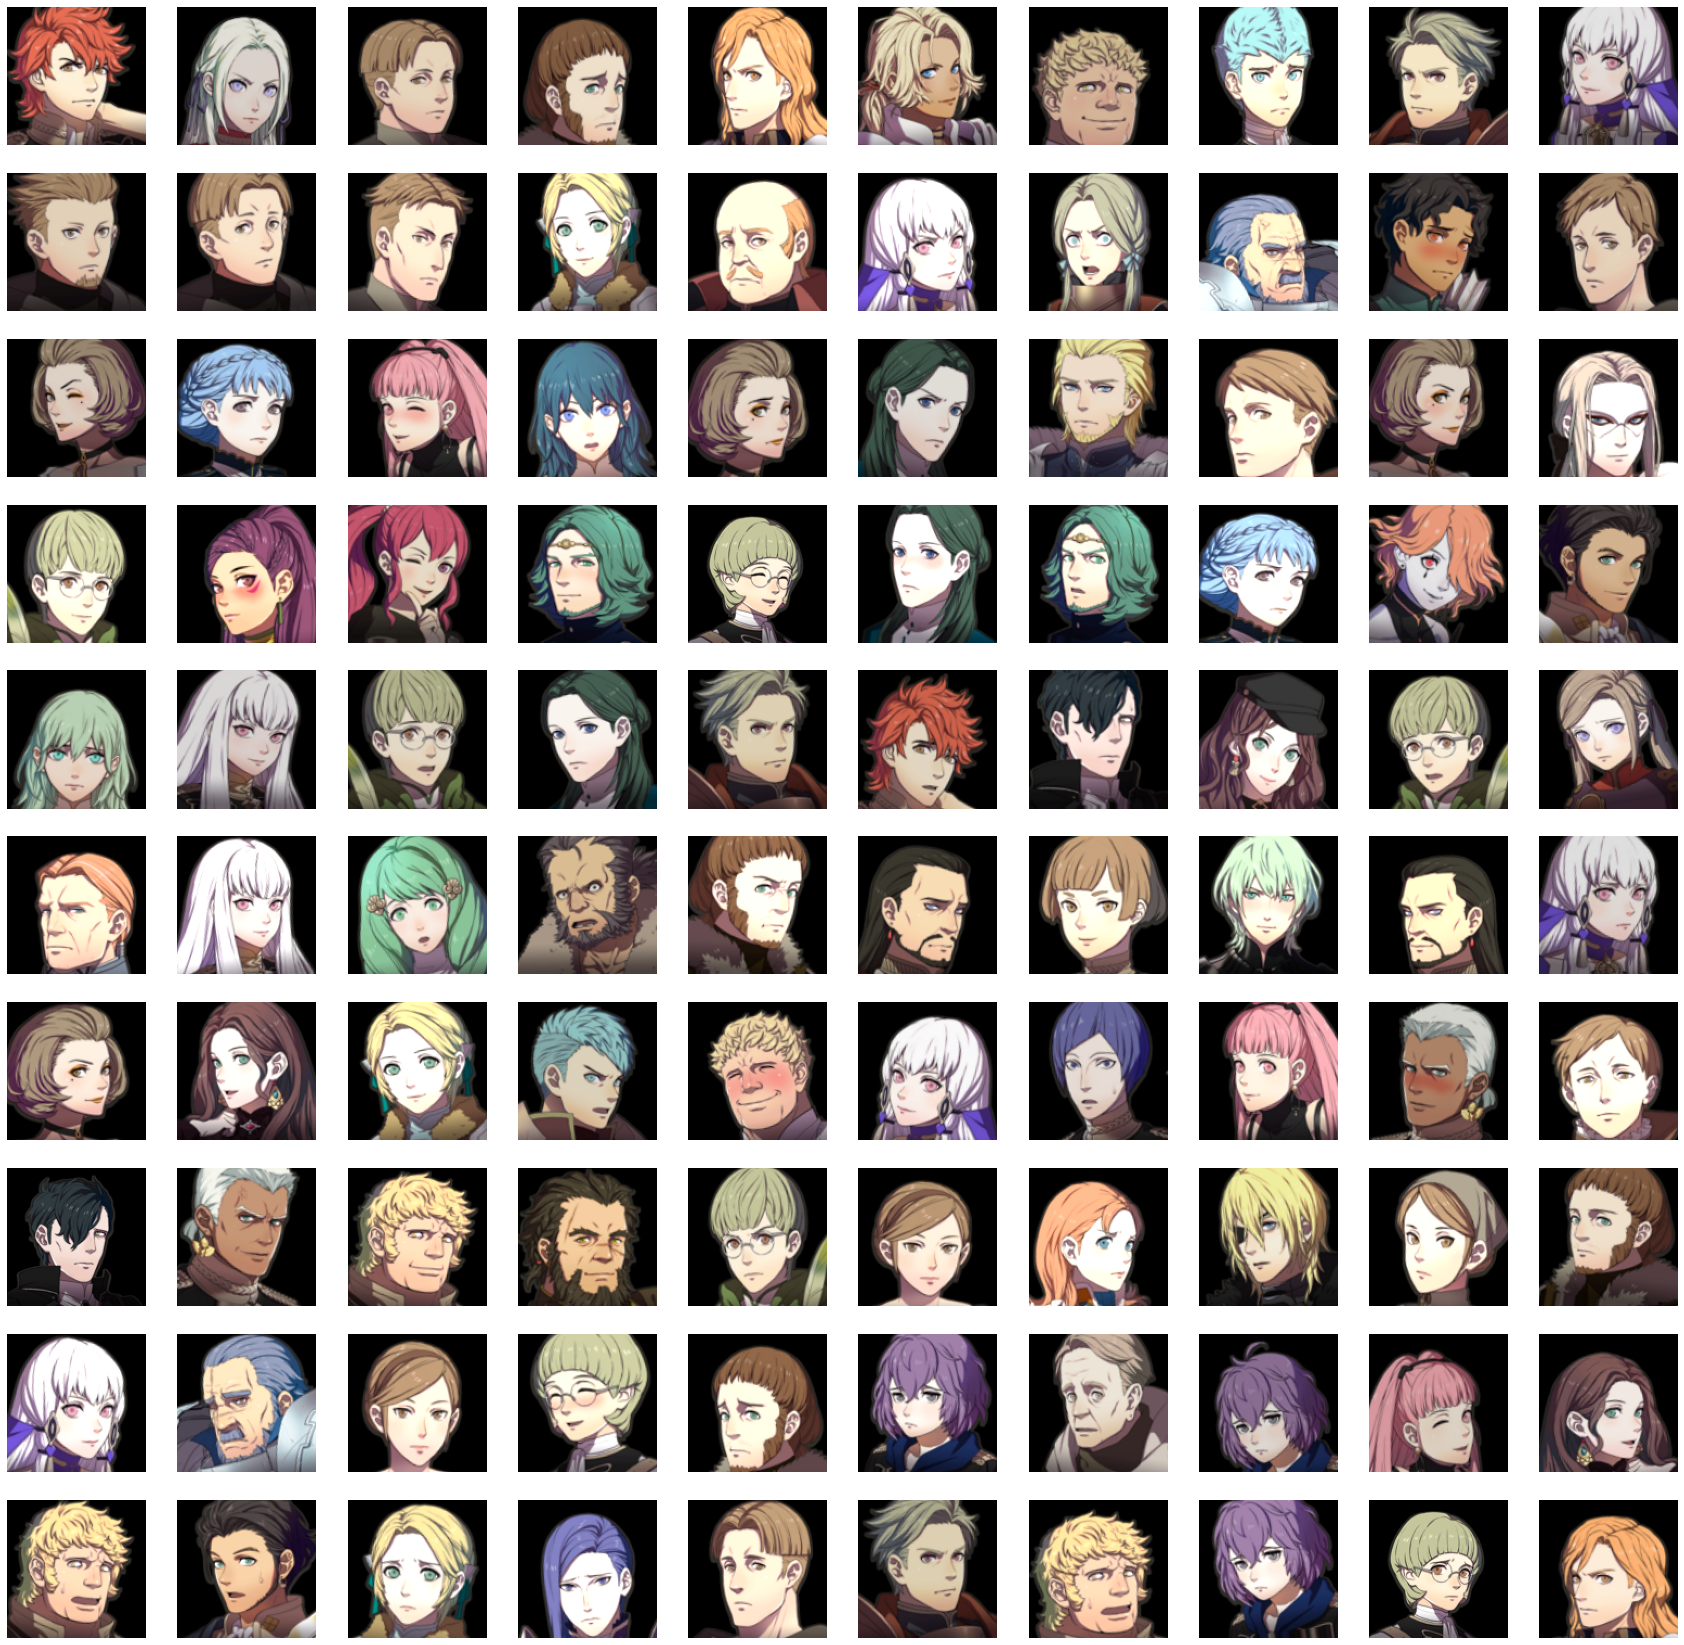

In [5]:
dataset = load_dataset("dataset/")
show_samples(dataset, 10)
savez_compressed("dataset128.npz", dataset)